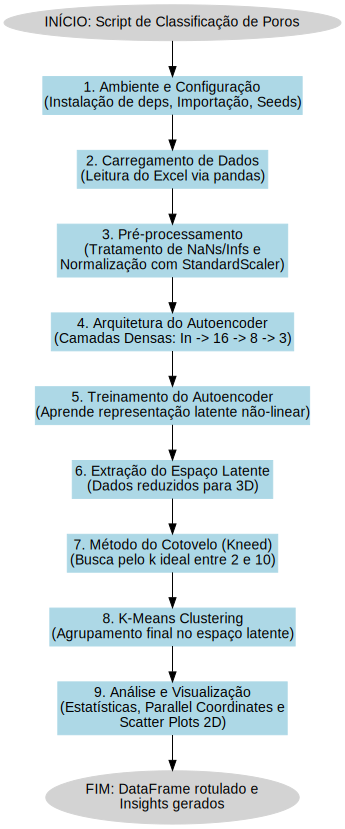

In [1]:
from graphviz import Digraph

def gerar_fluxograma_pore_type():
    # Cria o objeto do diagrama
    dot = Digraph(comment='Fluxograma de Classificação de Poros',
                  node_attr={'shape': 'rectangle', 'style': 'filled', 'color': 'lightblue', 'fontname': 'Arial'})

    # --- NÓS (ETAPAS) ---
    dot.node('START', 'INÍCIO: Script de Classificação de Poros', shape='ellipse', color='lightgrey')

    # Etapa 1: Preparação
    dot.node('SETUP', '1. Ambiente e Configuração\n(Instalação de deps, Importação, Seeds)')

    # Etapa 2: Dados
    dot.node('LOAD', '2. Carregamento de Dados\n(Leitura do Excel via pandas)')
    dot.node('PREP', '3. Pré-processamento\n(Tratamento de NaNs/Infs e\nNormalização com StandardScaler)')

    # Etapa 3: Autoencoder
    dot.node('AE_ARCH', '4. Arquitetura do Autoencoder\n(Camadas Densas: In -> 16 -> 8 -> 3)')
    dot.node('AE_TRAIN', '5. Treinamento do Autoencoder\n(Aprende representação latente não-linear)')
    dot.node('LATENT', '6. Extração do Espaço Latente\n(Dados reduzidos para 3D)')

    # Etapa 4: K-Means e Otimização
    dot.node('ELBOW', '7. Método do Cotovelo (Kneed)\n(Busca pelo k ideal entre 2 e 10)')
    dot.node('KMEANS', '8. K-Means Clustering\n(Agrupamento final no espaço latente)')

    # Etapa 5: Resultados
    dot.node('VIS', '9. Análise e Visualização\n(Estatísticas, Parallel Coordinates e\nScatter Plots 2D)')

    dot.node('END', 'FIM: DataFrame rotulado e\nInsights gerados', shape='ellipse', color='lightgrey')

    # --- CONEXÕES (FLUXO) ---
    dot.edge('START', 'SETUP')
    dot.edge('SETUP', 'LOAD')
    dot.edge('LOAD', 'PREP')
    dot.edge('PREP', 'AE_ARCH')
    dot.edge('AE_ARCH', 'AE_TRAIN')
    dot.edge('AE_TRAIN', 'LATENT')
    dot.edge('LATENT', 'ELBOW')
    dot.edge('ELBOW', 'KMEANS')
    dot.edge('KMEANS', 'VIS')
    dot.edge('VIS', 'END')

    # Renderiza o gráfico
    return dot

# Para visualizar no Jupyter/Colab:
fluxograma = gerar_fluxograma_pore_type()
fluxograma.render('fluxograma_processamento_poros', format='png', cleanup=True)
fluxograma

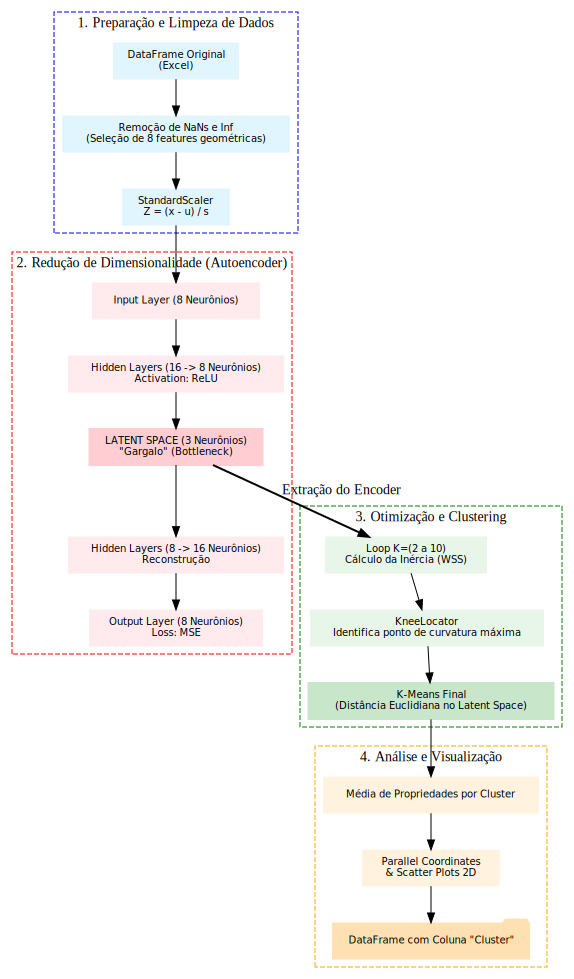

In [2]:
from graphviz import Digraph

def gerar_fluxograma_detalhado():
    dot = Digraph(comment='Fluxograma Detalhado Pore-Type Classification',
                  node_attr={'shape': 'rectangle', 'style': 'filled', 'fontname': 'Verdana', 'fontsize': '10'})

    # --- Grupo: Pré-processamento ---
    with dot.subgraph(name='cluster_0') as c:
        c.attr(label='1. Preparação e Limpeza de Dados', color='blue', style='dashed')
        c.node('DATA', 'DataFrame Original\n(Excel)', color='#E1F5FE')
        c.node('CLEAN', 'Remoção de NaNs e Inf\n(Seleção de 8 features geométricas)', color='#E1F5FE')
        c.node('SCALE', 'StandardScaler\nZ = (x - u) / s', color='#E1F5FE')

    # --- Grupo: Autoencoder (Rede Neural) ---
    with dot.subgraph(name='cluster_1') as c:
        c.attr(label='2. Redução de Dimensionalidade (Autoencoder)', color='red', style='dashed')
        c.node('ENC_IN', 'Input Layer (8 Neurônios)', color='#FFEBEE')
        c.node('ENC_HID', 'Hidden Layers (16 -> 8 Neurônios)\nActivation: ReLU', color='#FFEBEE')
        c.node('LATENT', 'LATENT SPACE (3 Neurônios)\n"Gargalo" (Bottleneck)', color='#FFCDD2', style='filled,bold')
        c.node('DEC_HID', 'Hidden Layers (8 -> 16 Neurônios)\nReconstrução', color='#FFEBEE')
        c.node('DEC_OUT', 'Output Layer (8 Neurônios)\nLoss: MSE', color='#FFEBEE')

    # --- Grupo: Clustering ---
    with dot.subgraph(name='cluster_2') as c:
        c.attr(label='3. Otimização e Clustering', color='green', style='dashed')
        c.node('ELBOW', 'Loop K=(2 a 10)\nCálculo da Inércia (WSS)', color='#E8F5E9')
        c.node('KNEE', 'KneeLocator\nIdentifica ponto de curvatura máxima', color='#E8F5E9')
        c.node('KMEANS', 'K-Means Final\n(Distância Euclidiana no Latent Space)', color='#C8E6C9', style='filled,bold')

    # --- Grupo: Saída ---
    with dot.subgraph(name='cluster_3') as c:
        c.attr(label='4. Análise e Visualização', color='orange', style='dashed')
        c.node('STATS', 'Média de Propriedades por Cluster', color='#FFF3E0')
        c.node('PLOT', 'Parallel Coordinates\n& Scatter Plots 2D', color='#FFF3E0')
        c.node('FINAL', 'DataFrame com Coluna "Cluster"', shape='folder', color='#FFE0B2')

    # Conexões
    dot.edge('DATA', 'CLEAN')
    dot.edge('CLEAN', 'SCALE')
    dot.edge('SCALE', 'ENC_IN')
    dot.edge('ENC_IN', 'ENC_HID')
    dot.edge('ENC_HID', 'LATENT')
    dot.edge('LATENT', 'DEC_HID')
    dot.edge('DEC_HID', 'DEC_OUT')
    dot.edge('LATENT', 'ELBOW', label='Extração do Encoder', style='bold')
    dot.edge('ELBOW', 'KNEE')
    dot.edge('KNEE', 'KMEANS')
    dot.edge('KMEANS', 'STATS')
    dot.edge('STATS', 'PLOT')
    dot.edge('PLOT', 'FINAL')

    return dot

# Renderizar
fluxo = gerar_fluxograma_detalhado()
fluxo.render('fluxograma_detalhado_poros', format='png', cleanup=True)
fluxo

In [4]:
from graphviz import Digraph

def gerar_fluxograma_expert():
    dot = Digraph(comment='Workflow Detalhado Pore-Type Classification',
                  node_attr={'shape': 'box', 'style': 'filled', 'fontname': 'Segoe UI', 'fontsize': '10'})
    dot.attr(rankdir='TB', size='12,12')

    # SEÇÃO 1: INGESTÃO E LIMPEZA
    with dot.subgraph(name='cluster_ingestao') as c:
        c.attr(label='ETAPA 1: INGESTÃO E TRATAMENTO', color='black', bgcolor='#f9f9f9')
        c.node('IN', 'Início: output_excel_path', shape='ellipse', color='#ffffff')
        c.node('READ', 'Leitura Pandas (read_excel)\nFiltro: 8 Features Geométricas')
        c.node('CLEAN', 'Tratamento de Dados:\n1. Drop NaNs\n2. Replace +/- Inf')
        c.node('SCALE', 'StandardScaler (Normalização):\nMedia=0, Variância=1', color='#fff3e0')

    # SEÇÃO 2: AUTOENCODER (DEEP LEARNING)
    with dot.subgraph(name='cluster_ae') as c:
        c.attr(label='ETAPA 2: REDE NEURAL (AUTOENCODER)', color='darkred', bgcolor='#fff5f5')
        c.node('ENC', 'ENCODER (Compressão)\nLayer 1: 16 Neurônios (ReLU)\nLayer 2: 8 Neurônios (ReLU)', color='#ffcdd2')
        c.node('LATENT', 'ESPAÇO LATENTE (Bottleneck)\n3 Neurônios (Representação 3D)', style='filled', fillcolor='#e57373', fontcolor='white')
        c.node('DEC', 'DECODER (Reconstrução)\nLayer 1: 8 Neurônios (ReLU)\nLayer 2: 16 Neurônios (ReLU)', color='#ffcdd2')
        c.node('LOSS', 'Otimizador Adam / Loss MSE\nMinimizar: ||X - Reconstruction||²', shape='diamond', color='#ef9a9a')

    # SEÇÃO 3: MACHINE LEARNING NÃO SUPERVISIONADO
    with dot.subgraph(name='cluster_ml') as c:
        c.attr(label='ETAPA 3: CLUSTERING (K-MEANS)', color='darkgreen', bgcolor='#f1f8e9')
        c.node('ELBOW_LOOP', 'Loop de Inércia:\nCalcular WCSS para K=[2..10]')
        c.node('KNEED', 'KneeLocator (Algoritmo de Detecção)\nEncontra curvatura máxima (Elbow)', color='#c5e1a5')
        c.node('FINAL_K', 'K-Means Final\nInput: Coordenadas do Latent Space', color='#81c784', style='filled')

    # SEÇÃO 4: OUTPUT E INTERPRETAÇÃO
    with dot.subgraph(name='cluster_output') as c:
        c.attr(label='ETAPA 4: RESULTADOS E VISUALIZAÇÃO', color='darkorange', bgcolor='#fff3e0')
        c.node('STATS', 'Groupby Cluster:\nMédias Geométricas Reais')
        c.node('PARALLEL', 'Parallel Coordinates Plot\n(Assinatura Geométrica do Poro)')
        c.node('SCATTER', 'Scatter Plots (2D Subspaces)\nVol vs Sphericity / Diam vs Sol')
        c.node('OUT', 'FIM: Excel Atualizado\n(Rock Types Classificados)', shape='ellipse', color='#ffffff')

    # Conexões Detalhadas
    dot.edge('IN', 'READ')
    dot.edge('READ', 'CLEAN')
    dot.edge('CLEAN', 'SCALE')
    dot.edge('SCALE', 'ENC')
    dot.edge('ENC', 'LATENT')
    dot.edge('LATENT', 'DEC')
    dot.edge('DEC', 'LOSS')
    dot.edge('LOSS', 'LATENT', label='Backpropagation', style='dotted')
    dot.edge('LATENT', 'ELBOW_LOOP', label='Predição (Encoder Only)')
    dot.edge('ELBOW_LOOP', 'KNEED')
    dot.edge('KNEED', 'FINAL_K')
    dot.edge('FINAL_K', 'STATS')
    dot.edge('STATS', 'PARALLEL')
    dot.edge('PARALLEL', 'SCATTER')
    dot.edge('SCATTER', 'OUT')

    return dot

# Visualizar
workflow = gerar_fluxograma_expert()
workflow

# O primeiro argumento é o nome do arquivo, o segundo é o formato
fluxo.render('fluxograma_pore_type_final', format='png', cleanup=True)
print("Imagem salva como: fluxograma_pore_type_final.png")

Imagem salva como: fluxograma_pore_type_final.png
